<a href="https://colab.research.google.com/github/Mar-celo/Enap/blob/master/exercicio_publicidade_reglinear_respondido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício de regressão linear - aula 03

# Introdução


### Treinamento supervisionado
#### Problema de regressão, pois a variável dependente é CONTÍNUA.

Escrever texto:  Dados de publicidade de 200 filiais de uma determinada empresa.   
Cada linha representa os gastos de uma determinada filial em milhares de dólares com TV, Rádio e jornal e as respectivas vendas de produtos(em milhares de itens).   
   
Objetivo do caderno:  criar modelo de regressão linear para prever o total de itens vendidos, com base na publicidade em TV, rádio e jornais.  
  
Fonte de dados:  Advertising.csv  
Existem 200 observações (representadas pelas linhas) e cada observação é um mercado único.  
  
Autor:  
Data:  


# Carregar bibliotecas de código

In [ ]:
# Carregar bibliotecas que serão utilizadas: (pandas, sklearn, etc)
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

# importa o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# biblioteca para gráficos
import seaborn as sns

# permitir que gráficos possam ser impressos dentro do caderno jupyter.
%matplotlib inline


# Análise exploratória do dados

In [ ]:
# Baixar o arquivo da web
!wget 'http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv'

--2020-07-17 03:11:08--  http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv
Resolving faculty.marshall.usc.edu (faculty.marshall.usc.edu)... 68.181.178.70
Connecting to faculty.marshall.usc.edu (faculty.marshall.usc.edu)|68.181.178.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4756 (4.6K) [application/octet-stream]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.64K  --.-KB/s    in 0s      

2020-07-17 03:11:09 (482 MB/s) - ‘Advertising.csv’ saved [4756/4756]



In [ ]:
# Ler dados
df = pd.read_csv('Advertising.csv', index_col=0)
# Mostrar dimensões e primeiras linhas do dataset
print(df.shape)
df.head()

(200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# Mostrar dimensões e últimas linhas do dataset
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [ ]:
# Mostra estatística báasica das 'features'
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


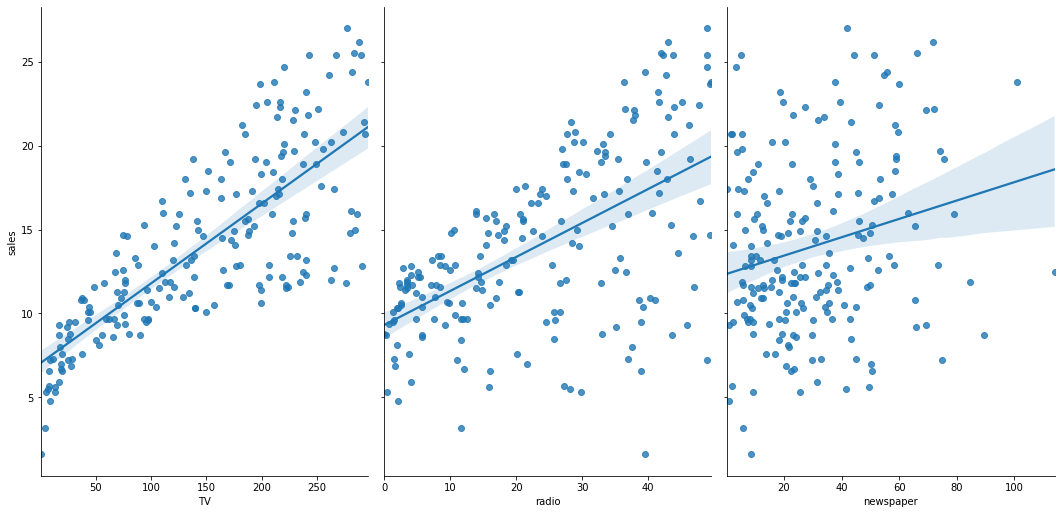

In [ ]:
# Apresentar gráfico mostrando as relações entre as variáveis independentes e a dependente (vendas).
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales',
             height=7, aspect=0.7, kind='reg');

### Forma de regressão linear

$ y = \ beta_0 + \ beta_1x_1 + \ beta_2x_2 + ... + \ beta_nx_n $

- $ y $ é a resposta
- $ \ beta_0 $ é a interceptação
- $ \ beta_1 $ é o coeficiente de $ x_1 $ (a primeira 'feature')
- $ \ beta_n $ é o coeficiente de $ x_n $ (a enésima 'feature')

Nesse caso:

$ y = \ beta_0 + \ beta_1 \ . TV + \ beta_2 \ . Radio + \ beta_3 \ . Jornal $

Os valores de $ \ beta $ são chamados de ** coeficientes do modelo **. Esses valores são "aprendidos" durante a etapa de ajuste do modelo usando o critério "mínimos quadrados". Em seguida, o modelo ajustado pode ser usado para fazer previsões!

# Preparação dos dados
O scikit-learn espera que X (matriz de 'features') e y (vetor de resposta) sejam matrizes NumPy.
No entanto, o Pandas é construído sobre o NumPy.
Assim, X pode ser um Pandas DataFrame e y pode ser uma série do Pandas.

In [ ]:
# atribui os valores das variáveis independentes a 'X'
# cria uma lista contendo nomes das features
feature_cols = ['TV', 'radio', 'newspaper']
# usa a lista e atribui a X um subset do dataframe
X = df[feature_cols]

# select a Series from the DataFrame
y = df['sales']

print('X = ', X.shape)
print('y = ', y.shape)

X =  (200, 3)
y =  (200,)


In [ ]:
# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Confere as dimensões dos datasets de treino e teste
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Treinar o modelo

In [ ]:
# instancia modelo de regressão linear
reg_lin = LinearRegression()

# treina o modelo (aprende os coeficientes)
reg_lin.fit(X_train, y_train)


LinearRegression()

# Interpretação dos coeficientes

In [ ]:
# Mostra 
print(reg_lin.intercept_)
print(reg_lin.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, reg_lin.coef_))

[('TV', 0.046564567874150295),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.0034504647111804343)]

Como interpretamos o coeficiente de TV (0,0466)?

- Para uma determinada quantidade de gastos com anúncios em rádio e jornal,  US $ 1.000 adicionais gastos em anúncios de TV  resulta em um  aumento nas vendas de 46,6 itens.


# Testar o modelo (inferência)

In [ ]:
# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

In [ ]:
# mostrar resultado da predição
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

## Avaliar qualidade do modelo
RMSE  
Erro médio quadrático da raiz (RMSE) é a raiz quadrada da média dos erros quadráticos.

In [ ]:
# Cálculo do RMSE usando o scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


Temos um total de 3 variáveis independentes (preditivas): TV, rádio e jornais.  
Será que todas são importantes para fazer a melhor predição do total de vendas?  
E se tirássemos a variável 'newspaper' ?


In [ ]:
# cria uma lista contendo nomes das features, desta vez sem 'newspaper'
feature_cols = ['TV', 'radio']
# usa a lista e atribui a X um subset do dataframe
X = df[feature_cols]

# select a Series from the DataFrame
y = df['sales']

# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# treina o modelo (aprende os coeficientes)
reg_lin.fit(X_train, y_train)

# Fazer a predição para os dados do dataset de teste
y_pred = reg_lin.predict(X_test)

# Cálculo do RMSE usando o scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382893


### Acabamos de verificar que o erro diminuiu ao eliminarmos a variável 'newspaper'.